In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
!pip install --upgrade xlrd
!pip install statsmodels --upgrade
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
     |████████████████████████████████| 9.8 MB 9.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
#Read the dataset into python environment
data=pd.read_excel(r'https://github.com/hashi4all/RIO-125-Forecasting-System---Project-Demand-of-Products-at-a-Retail-Outlet-Based-on-Historical-Data/blob/main/Sample%20-%20Superstore.xls?raw=true',parse_dates=['Order Date'])

In [3]:
#visual inspection of raw data
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
#missing value detection
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
#columns of dataset
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
#shape of data
data.shape

(9994, 21)

In [7]:
#summary of data
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [9]:
variables=['Order Date','Category', 'Sales']
grp_var=variables[:2]
outcome_var=variables[2]
base=data.groupby(grp_var)[outcome_var].sum().reset_index()

In [10]:
base.head()

,Order Date,Category,Sales
0,2011-01-04,Office Supplies,16.448
1,2011-01-05,Office Supplies,288.060
2,2011-01-06,Office Supplies,19.536
3,2011-01-07,Furniture,2573.820
4,2011-01-07,Office Supplies,685.340


In [11]:
print(base['Category'].unique())

['Office Supplies' 'Furniture' 'Technology']


In [12]:
base.set_index('Order Date',inplace=True)

In [13]:
print(base.index.unique)

<bound method Index.unique of DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-07', '2011-01-07', '2011-01-08', '2011-01-08',
               '2011-01-10', '2011-01-10',
               ...
               '2014-12-28', '2014-12-29', '2014-12-29', '2014-12-29',
               '2014-12-30', '2014-12-30', '2014-12-30', '2014-12-31',
               '2014-12-31', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=2864, freq=None)>


In [14]:
fur=base.loc[base['Category']=='Furniture']
fur=fur.sort_values('Order Date')
fur=fur.groupby('Order Date')['Sales'].sum()


In [15]:
fur.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

In [16]:
office=base.loc[base['Category']=='Office Supplies']
office=office.sort_values('Order Date')
office=office.groupby('Order Date')['Sales'].sum()

In [17]:
office.index

DatetimeIndex(['2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07',
               '2011-01-08', '2011-01-10', '2011-01-11', '2011-01-14',
               '2011-01-17', '2011-01-19',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1149, freq=None)

In [18]:
tech=base.loc[base['Category']=='Technology']
tech=tech.sort_values('Order Date')
tech=tech.groupby('Order Date')['Sales'].sum()

In [19]:
tech.index

DatetimeIndex(['2011-01-07', '2011-01-10', '2011-01-14', '2011-01-16',
               '2011-01-17', '2011-01-21', '2011-01-27', '2011-02-02',
               '2011-02-03', '2011-02-07',
               ...
               '2014-12-19', '2014-12-22', '2014-12-23', '2014-12-24',
               '2014-12-25', '2014-12-26', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=825, freq=None)

Furniture

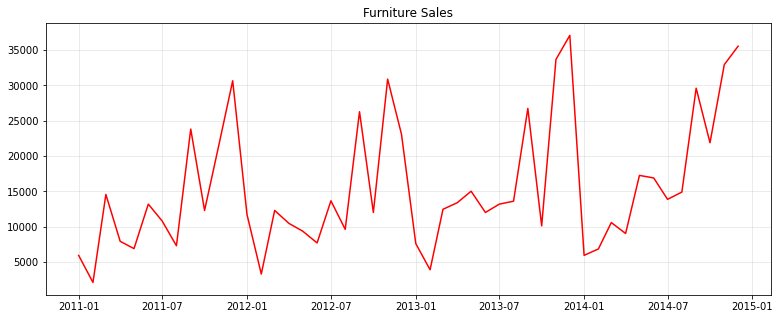

In [20]:
#considering furniture sales 
df_furniture=fur.resample('MS').sum()
plt.figure(figsize=(13,5))
plt.plot(df_furniture,color='r')
plt.title('Furniture Sales')
plt.grid(alpha=0.3)

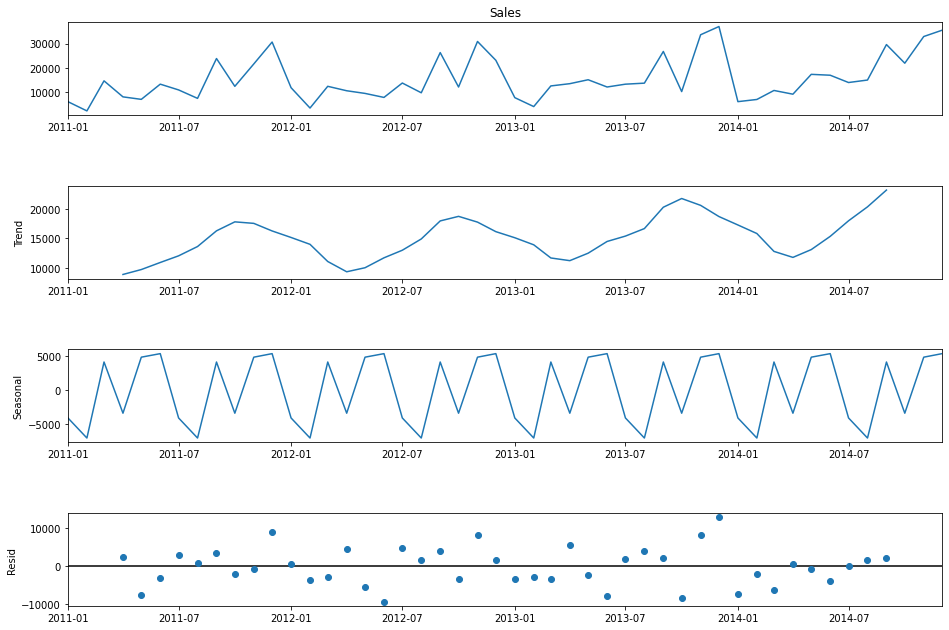

In [21]:
#time series decomposition
#its additive-->Seasonality is independent of trend
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition=seasonal_decompose(df_furniture,model='additive',period=6)
fig=ss_decomposition.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

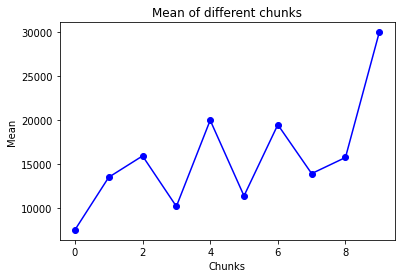

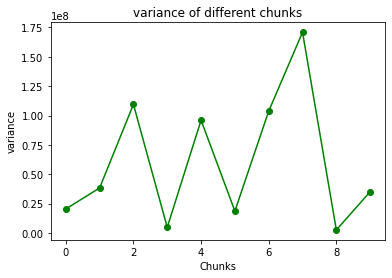

In [22]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_furniture,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of furniture sales')

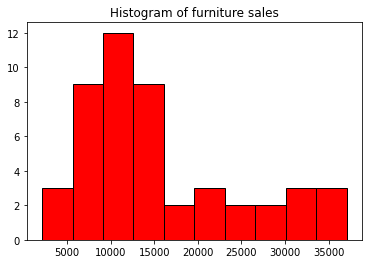

In [23]:
#2.Histogram plots
plt.hist(df_furniture,color='red',edgecolor='black')
plt.title('Histogram of furniture sales')

In [24]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_furniture,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -4.562554286669771
p-value: 0.00015133079510488623


In [25]:
#non stationary to stationary transformation

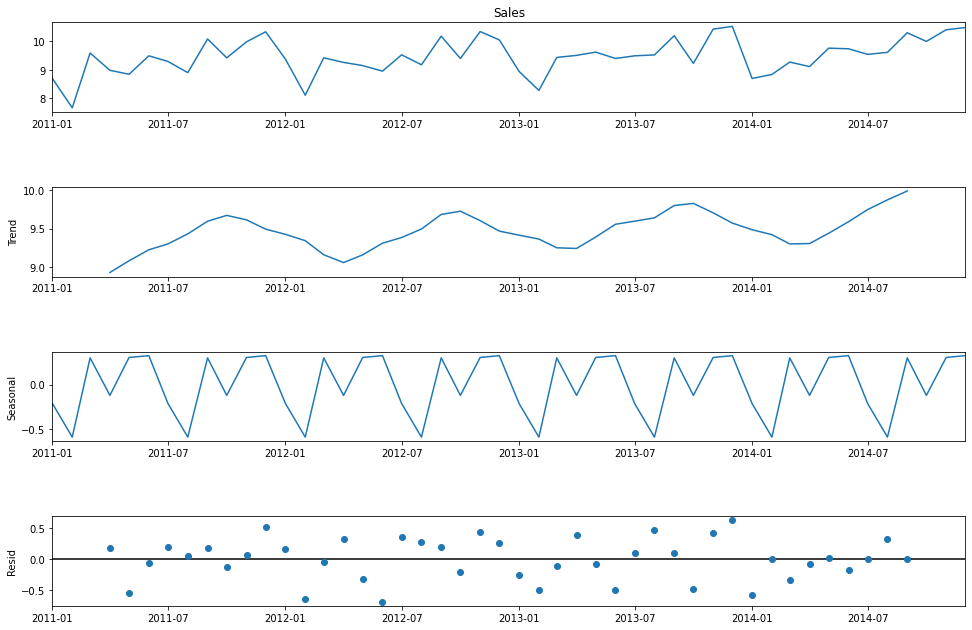

In [26]:
df_log_furniture=np.log1p(df_furniture)
fig=seasonal_decompose(df_log_furniture,model='additive',period=6).plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

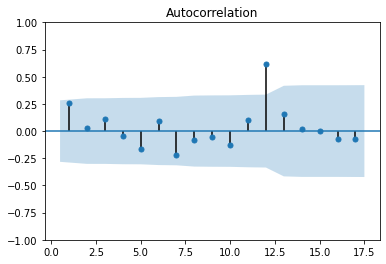

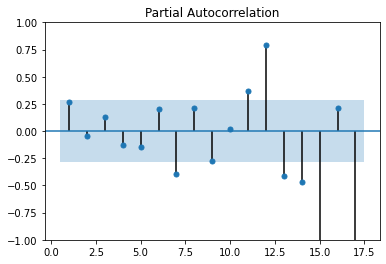

In [27]:
plot_acf(df_log_furniture,zero=False)
plot_pacf(df_log_furniture,zero = False);

In [28]:
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_log_furniture,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -4.97638906152064
p-value: 2.4709140358683213e-05


In [29]:
#Predictive analysis

In [30]:
#time component
time=np.arange(len(df_log_furniture))
np_furniture=df_log_furniture.to_numpy()

In [31]:
np_furniture

array([ 8.69162689,  7.66449866,  9.58705999,  8.98040342,  8.84127281,
        9.48851178,  9.28934109,  8.89854954, 10.07817508,  9.41778104,
        9.97886738, 10.33028896,  9.37083729,  8.10775801,  9.41865703,
        9.25690888,  9.14590323,  8.95094497,  9.52335534,  9.17363408,
       10.17633601,  9.39496124, 10.33792334, 10.04701714,  8.93902274,
        8.27551671,  9.43140945,  9.50350166,  9.61794905,  9.39498049,
        9.48799567,  9.51931663, 10.19391439,  9.22343151, 10.42407687,
       10.5205548 ,  8.6936697 ,  8.83453174,  9.26845191,  9.11093176,
        9.75660469,  9.73530116,  9.5384004 ,  9.60980525, 10.29548822,
        9.99355987, 10.40207824, 10.47836331])

In [32]:
#Train Test split
#20% of 97 instance is taken as test size
test_size=19
train=np_furniture[:-test_size]
test=np_furniture[-test_size:]

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [34]:
#MSE function
def mse(obs,est):
  assert type(obs)==type (np.array([]))
  assert type(est)==type (np.array([]))
  assert len(obs)==len(est)
  diff=obs-est
  sq_diff=diff**2
  mse=sum(sq_diff)
  return mse

In [35]:
triple_mse=mse(test,triple_preds)
print('MSE:',triple_mse)

MSE: 1.69249305402832


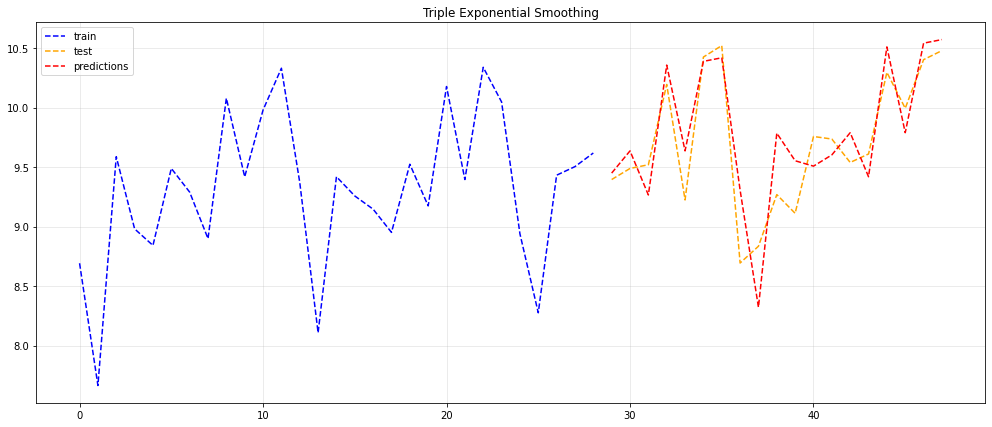

In [36]:
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

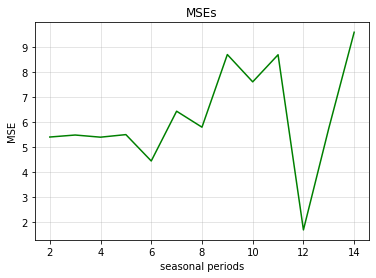

In [37]:
#best possible seasonal period selection
mse_list=[]
seasonal_period=[]

for i in range (2,15):
  Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=i).fit(optimized=True)
  triple_preds=Triple.forecast(len(test))
  triple_mse=mse(test,triple_preds)
  mse_list.append(triple_mse)
  seasonal_period.append(i)
plt.plot(seasonal_period,mse_list,color='g')
plt.title('MSEs')
plt.xlabel('seasonal periods')
plt.ylabel('MSE')
plt.grid(alpha=0.4)


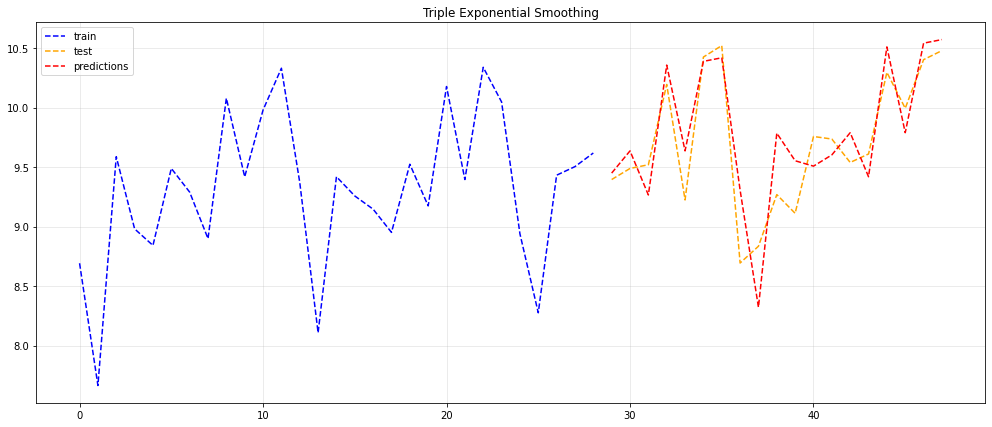

In [38]:
#lowest MSE @ seasonal period=24
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [39]:
#pdq estimation (autoARIMA function)
!pip install pmdarima


     |████████████████████████████████| 1.4 MB 7.5 MB/s 


In [40]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_furniture, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0,max_P=3,start_Q=0,max_Q=3, seasonal=True,
                           d=None, D=None,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20.371, Time=0.07 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22.060, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=19.979, Time=0.49 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=23.936, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=21.569, Time=0.09 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=21.137, Time=0.42 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=20.722, Time=0.09 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=21.161, Time=0.17 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=22.409, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12]             : AIC=27.856, Time=0.12 s

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sar = SARIMAX(df_log_furniture, 
                                order=(0,0,1),
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  -5.990
Date:                            Thu, 19 May 2022   AIC                             19.979
Time:                                    13:13:36   BIC                             26.313
Sample:                                01-01-2011   HQIC                            22.190
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1229      0.024      5.021      0.000       0.075       0.171
ma.L1         -0.3434      0.230     -1.496      0.135      -0.793       0.107
ma.S.L12      -0.5434      0.366     -1.486      0.137      -1.260       0.173
sigma2         0.0726      0.026      2.817      0.005       0.022       0.123
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.93   Prob(JB):                         0.68
Heteroskedasticity (H):               1.06   Skew:                            -0.23
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

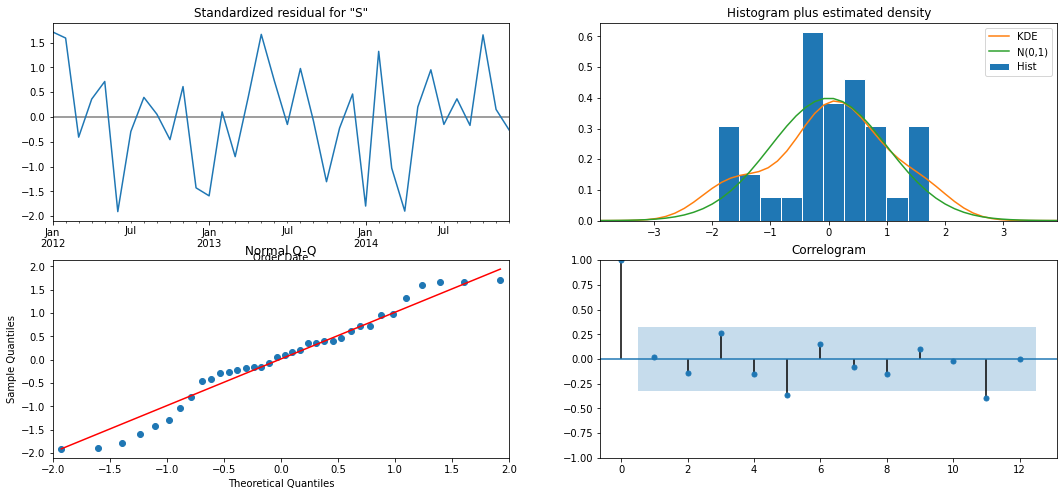

In [42]:
sar.plot_diagnostics(lags=12,figsize=(18,8))
plt.show()

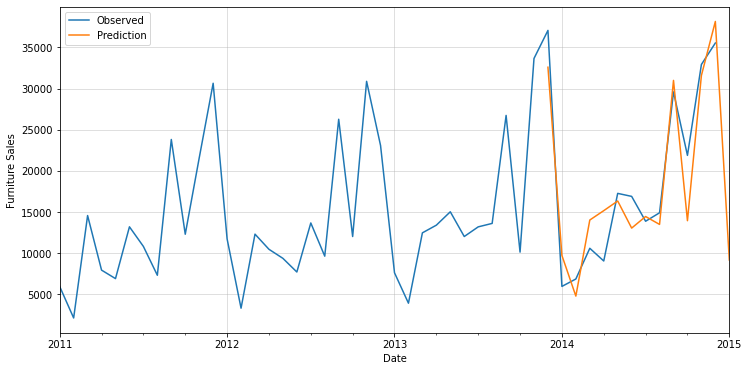

In [43]:
pd.plotting.register_matplotlib_converters()
pred=sar.predict(start=35,end=48)
pred=np.expm1(pred)
ax=df_furniture.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [44]:
print(pred)

2013-12-01    32594.717370
2014-01-01     9731.062873
2014-02-01     4790.179271
2014-03-01    14030.782798
2014-04-01    15168.602405
2014-05-01    16342.631073
2014-06-01    13049.796347
2014-07-01    14456.071635
2014-08-01    13496.646838
2014-09-01    30994.082741
2014-10-01    13948.912678
2014-11-01    31590.327398
2014-12-01    38154.047857
2015-01-01     9175.950584
Freq: MS, Name: predicted_mean, dtype: float64


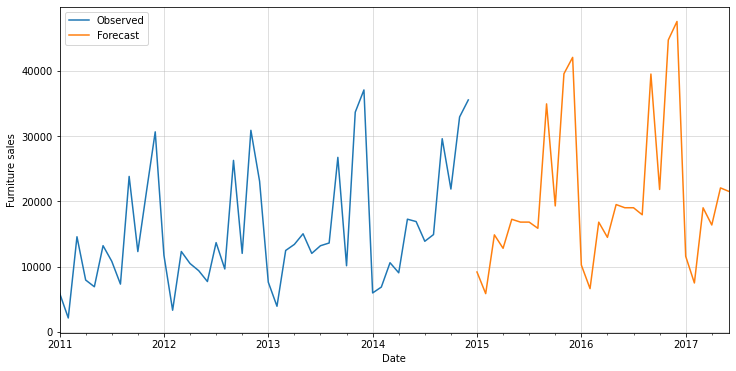

In [45]:
future_fcst=sar.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_furniture.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Furniture sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [46]:
print(fcst)

2015-01-01     9175.950584
2015-02-01     5860.579326
2015-03-01    14867.380444
2015-04-01    12806.226034
2015-05-01    17250.209798
2015-06-01    16818.815625
2015-07-01    16819.406297
2015-08-01    15869.443929
2015-09-01    34933.897809
2015-10-01    19298.328192
2015-11-01    39552.274633
2015-12-01    42058.610342
2016-01-01    10241.936630
2016-02-01     6627.303322
2016-03-01    16812.239232
2016-04-01    14481.475481
2016-05-01    19506.754626
2016-06-01    19018.931930
2016-07-01    19019.599864
2016-08-01    17945.377650
2016-09-01    39503.557786
2016-10-01    21822.777185
2016-11-01    44726.041479
2016-12-01    47560.218478
2017-01-01    11581.764152
2017-02-01     7494.318665
2017-03-01    19011.495312
2017-04-01    16375.855964
2017-05-01    22058.466844
2017-06-01    21506.834490
Freq: MS, Name: predicted_mean, dtype: float64


In [47]:
#Prophet model

In [48]:
from fbprophet import Prophet

In [49]:
fur=pd.DataFrame({'ds':df_furniture.index,'y':df_furniture.values})
fur_model=Prophet()
fur_model.fit(fur)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
fur_fcst=fur_model.make_future_dataframe(periods=36,freq='MS')
print(fur_fcst.head())
fur_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


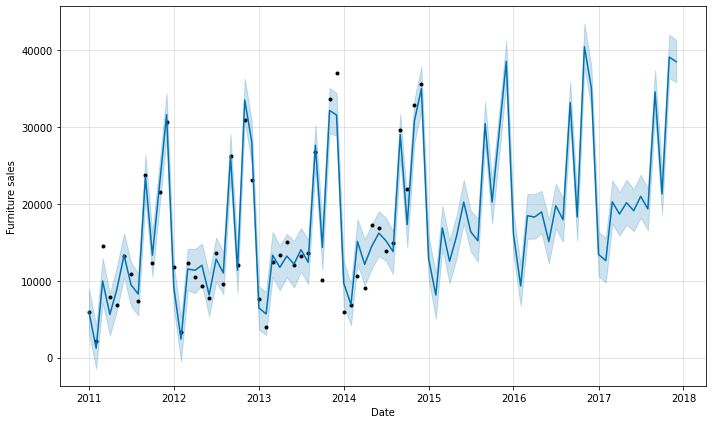

In [51]:
fur_fcst=fur_model.predict(fur_fcst)
fur_model.plot(fur_fcst,xlabel='Date',ylabel='Furniture sales')
plt.show()

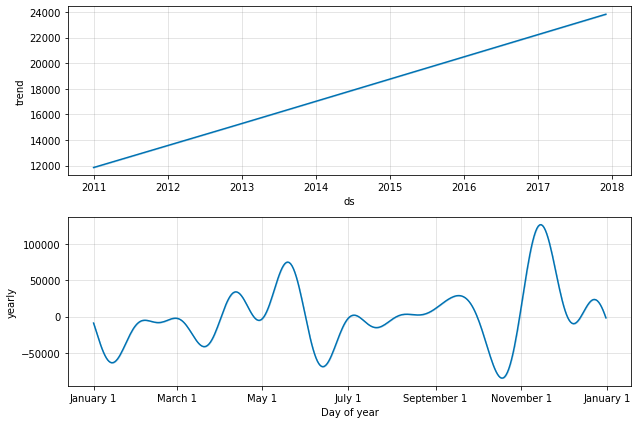

In [52]:
fur_model.plot_components(fur_fcst)
plt.show()

Office Supplies

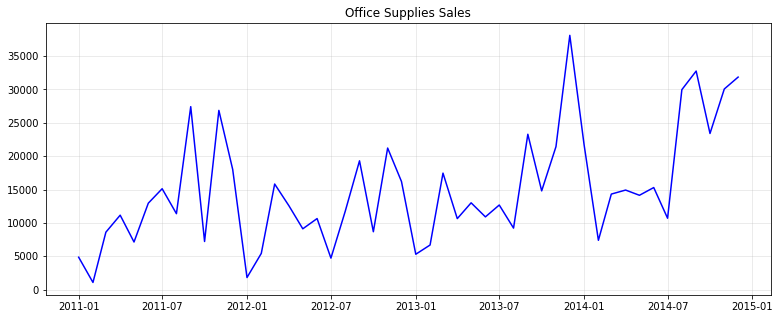

In [53]:
df_office=office.resample('MS').sum()
plt.figure(figsize=(13,5))
plt.plot(df_office,color='b')
plt.title('Office Supplies Sales')
plt.grid(alpha=0.3)

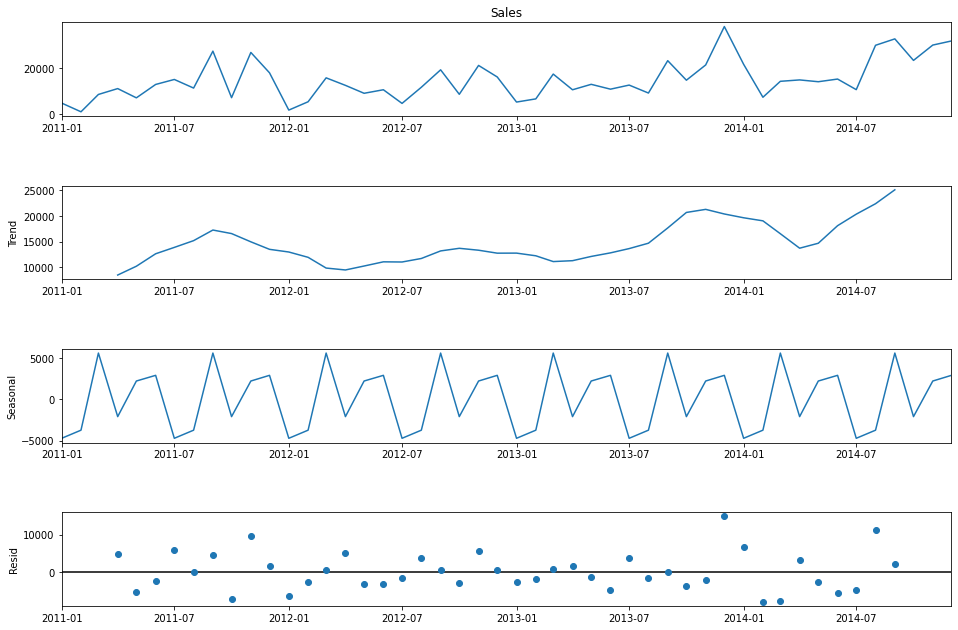

In [54]:
#time series decomposition
#its additive-->Seasonality is independent of trend
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition=seasonal_decompose(df_office,model='additive',period=6)
fig=ss_decomposition.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

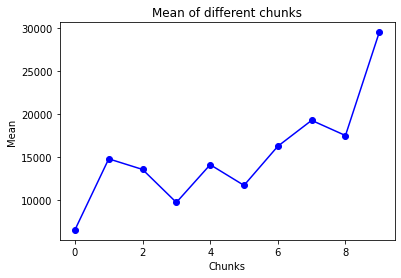

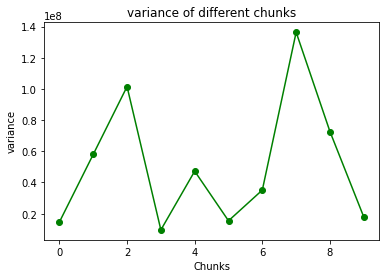

In [55]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_office,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of Office Supplies sales')

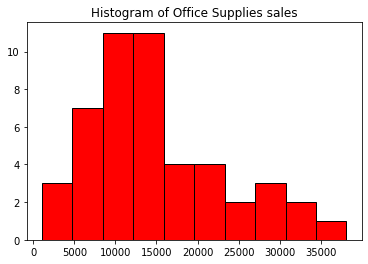

In [56]:
#2.Histogram plots
plt.hist(df_office,color='red',edgecolor='black')
plt.title('Histogram of Office Supplies sales')

In [57]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_office,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -1.9231245772499268
p-value: 0.32126198801329564


In [58]:
#non stationary to stationary transformations

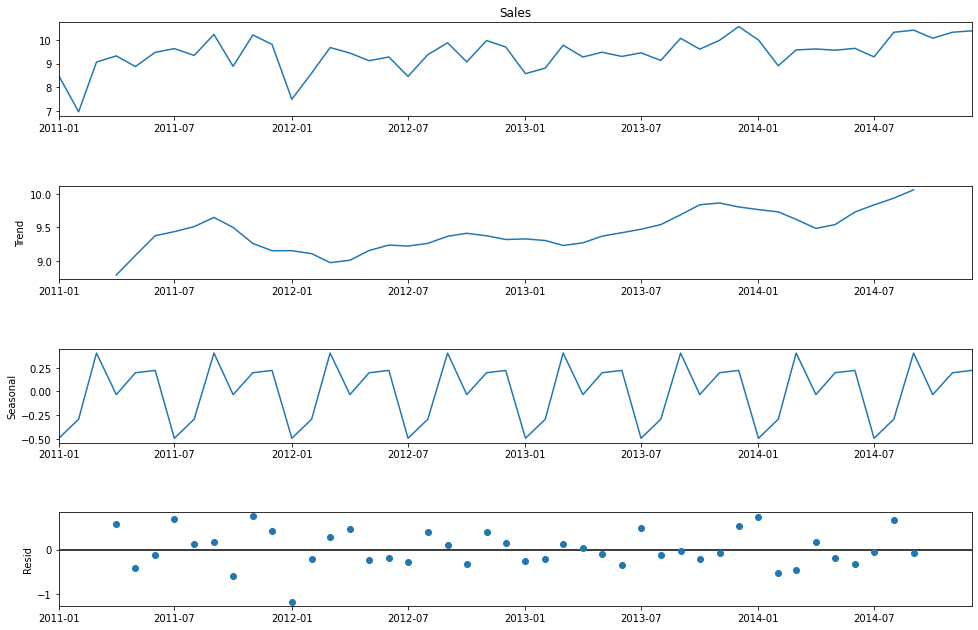

In [59]:
df_log_office=np.log1p(df_office)
fig=seasonal_decompose(df_log_office,model='additive',period=6).plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

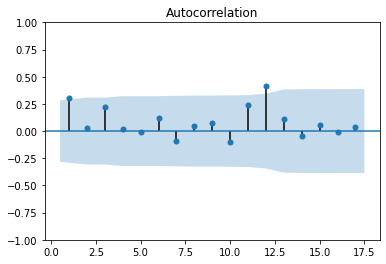

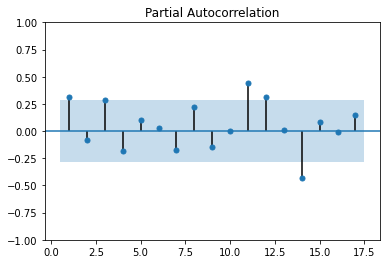

In [60]:
plot_acf(df_log_office,zero=False)
plot_pacf(df_log_office,zero = False);

In [61]:
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_log_office,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: 0.29766766451523136
p-value: 0.9772372268603158


In [62]:
#Predictive Analysis

In [63]:
#time component
time=np.arange(len(df_log_office))
np_log_office=df_log_office.to_numpy()

In [64]:
#Train Test split
#20% of 97 instance is taken as test size
test_size=10
train=np_log_office[:-test_size]
test=np_log_office[-test_size:]

In [65]:
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [66]:
triple_mse=mse(test,triple_preds)
print('MSE:',triple_mse)

MSE: 0.9794068205091099


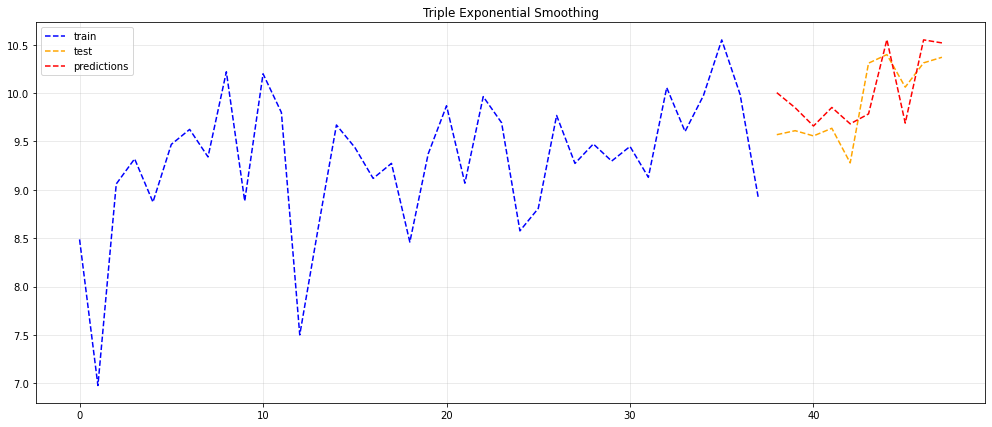

In [67]:
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

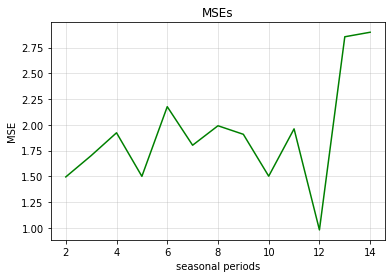

In [68]:
#best possible seasonal period selection
mse_list=[]
seasonal_period=[]

for i in range (2,15):
  Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=i).fit(optimized=True)
  triple_preds=Triple.forecast(len(test))
  triple_mse=mse(test,triple_preds)
  mse_list.append(triple_mse)
  seasonal_period.append(i)
plt.plot(seasonal_period,mse_list,color='g')
plt.title('MSEs')
plt.xlabel('seasonal periods')
plt.ylabel('MSE')
plt.grid(alpha=0.4)

In [69]:
#auto_arima

In [70]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_office, start_p=0, start_q=0,
                           max_p=3, max_q=3,m=12,
                           start_P=0,max_P=3,start_Q=0,max_Q=3, seasonal=True,
                           d=None, D=None,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=116.707, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=103.347, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=114.823, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=111.437, Time=0.12 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=105.042, Time=0.74 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=105.717, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.66 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=111.767, Time=0.27 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=95.260, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=99.683, Time=0.10 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=96.138, Time=0.88 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=97.241, T

In [71]:
from statsmodels.tsa.arima.model import ARIMA
sar2=SARIMAX(df_log_office,order=(0,1,1),seasonal_order=(1,0,0,12), trend='c').fit()
sar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                 -38.716
Date:                             Thu, 19 May 2022   AIC                             85.431
Time:                                     13:14:36   BIC                             92.832
Sample:                                 01-01-2011   HQIC                            88.216
                                      - 12-01-2014                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0089      0.004      2.019      0.043       0.000       0.018
ma.L1         -0.9996     10.882     -0.092      0.927     -22.327      20.328
ar.S.L12       0.5744      0.138      4.152      0.000       0.303       0.846
sigma2         0.2596      2.836      0.092      0.927      -5.299       5.818
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 3.81
Prob(Q):                              0.85   Prob(JB):                         0.15
Heteroskedasticity (H):               0.33   Skew:                            -0.57
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

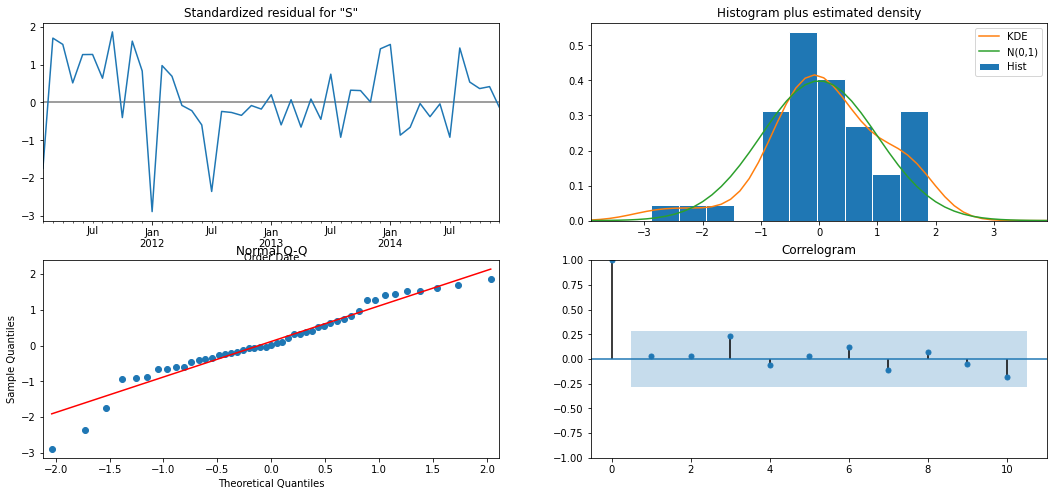

In [72]:
sar2.plot_diagnostics(figsize=(18,8))
plt.show()

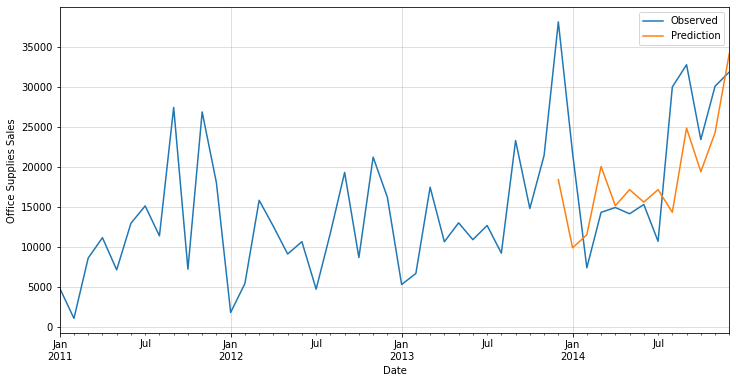

In [73]:
pd.plotting.register_matplotlib_converters()
pred=sar2.predict(start=35,end=47)
pred=np.expm1(pred)
ax=df_office.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [74]:
print('________PREDICTIONS_________')
print(pred)

________PREDICTIONS_________
Order Date
2013-12-01    18408.546774
2014-01-01     9880.638537
2014-02-01    11519.795648
2014-03-01    20048.892257
2014-04-01    15149.401453
2014-05-01    17151.029049
2014-06-01    15595.040443
2014-07-01    17154.811584
2014-08-01    14324.646312
2014-09-01    24847.720124
2014-10-01    19393.136678
2014-11-01    24260.281041
2014-12-01    34165.300028
Freq: MS, Name: predicted_mean, dtype: float64


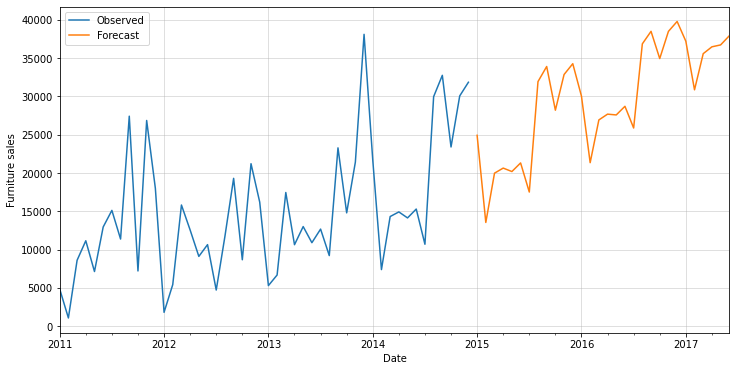

In [75]:
future_fcst=sar2.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_office.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Furniture sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [76]:
print('__________FORECAST________')
print(fcst)

__________FORECAST________
2015-01-01    24924.971559
2015-02-01    13545.204137
2015-03-01    19981.166853
2015-04-01    20644.885546
2015-05-01    20194.182578
2015-06-01    21318.946387
2015-07-01    17517.052622
2015-08-01    31937.510445
2015-09-01    33911.556112
2015-10-01    28205.380875
2015-11-01    32865.242688
2015-12-01    34276.408236
2016-01-01    30038.772394
2016-02-01    21352.159867
2016-03-01    26933.347702
2016-04-01    27689.729765
2016-05-01    27586.087748
2016-06-01    28713.589290
2016-07-01    25880.311387
2016-08-01    36869.106068
2016-09-01    38503.490820
2016-10-01    34947.761630
2016-11-01    38497.901306
2016-12-01    39792.506373
2017-01-01    37218.603800
2017-02-01    30866.980120
2017-03-01    35587.264979
2017-04-01    36482.156481
2017-05-01    36730.121617
2017-06-01    37922.065744
Freq: MS, Name: predicted_mean, dtype: float64


In [77]:
#Prophet Model

In [78]:
office=pd.DataFrame({'ds':df_office.index,'y':df_office.values})
office_model=Prophet()
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [79]:
office_fcst=office_model.make_future_dataframe(periods=36,freq='MS')
print(office_fcst.head())
office_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


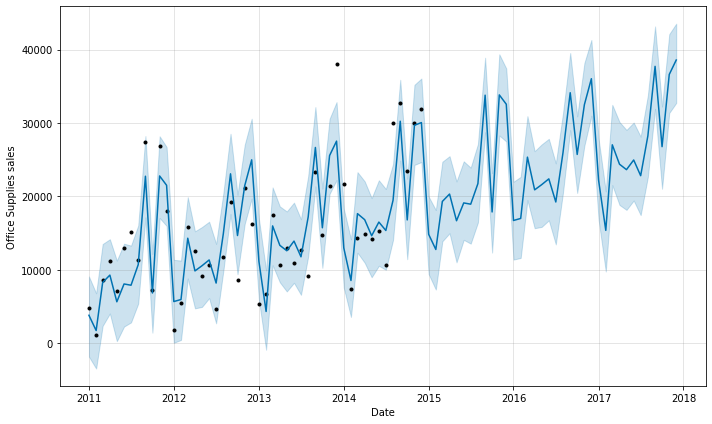

In [80]:
office_fcst=office_model.predict(office_fcst)
office_model.plot(office_fcst,xlabel='Date',ylabel='Office Supplies sales')
plt.show()

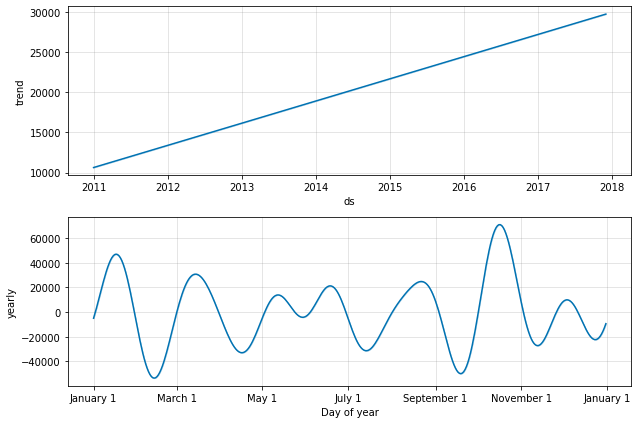

In [81]:
office_model.plot_components(office_fcst)
plt.show()

Technology

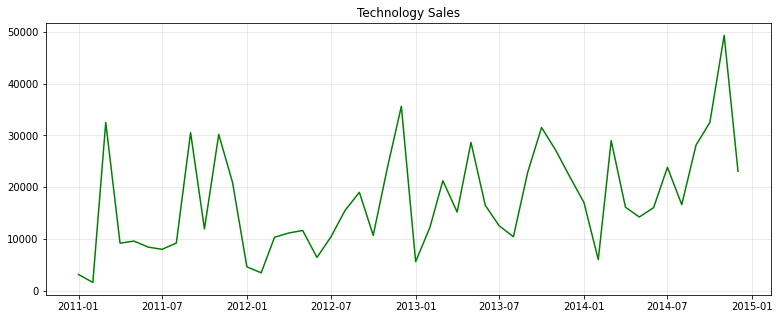

In [82]:
df_tech=tech.resample('MS').sum()
plt.figure(figsize=(13,5))
plt.plot(df_tech,color='g')
plt.title('Technology Sales')
plt.grid(alpha=0.3)

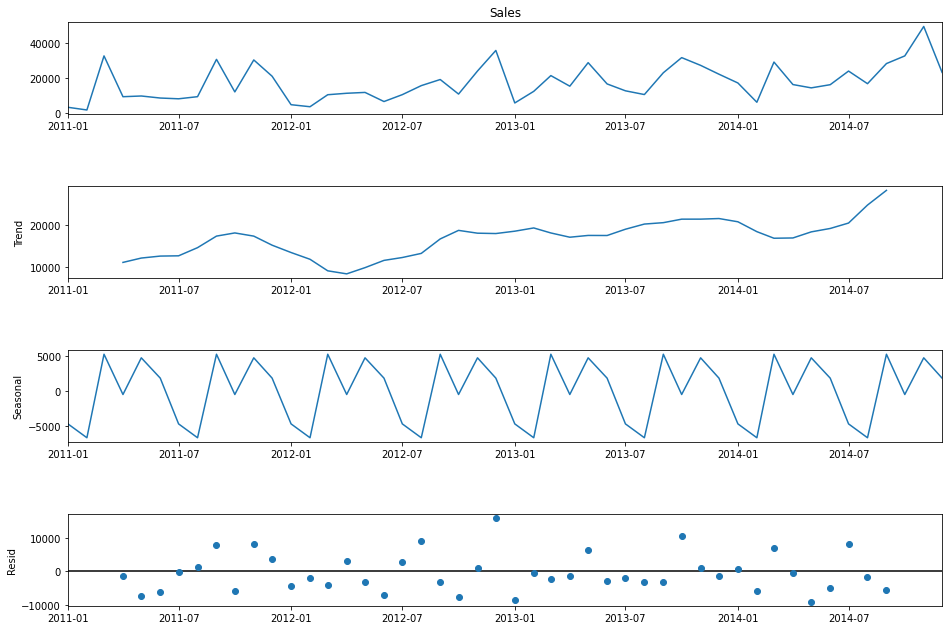

In [83]:
#time series decomposition
#its additive-->Seasonality is independent of trend
from statsmodels.tsa.seasonal import seasonal_decompose
ss_decomposition=seasonal_decompose(df_tech,model='additive',period=6)
fig=ss_decomposition.plot()
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

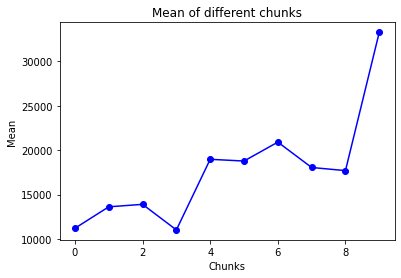

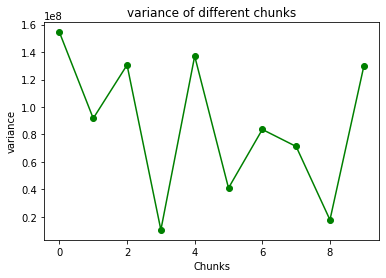

In [84]:
#checking stationarity
#1.Summary and statistics plot
chunks=np.array_split(df_tech,10)
mean_list=[]
variance_list=[]

for i in range(0,10):
  mean=chunks[i].mean()
  variance=chunks[i].var()
  mean_list.append(mean)
  variance_list.append(variance)

#plot
chunks_no=range(0,10)
plt.plot(chunks_no,mean_list,'o-',color='b')
plt.title('Mean of different chunks')
plt.xlabel('Chunks')
plt.ylabel('Mean')
plt.show()

plt.plot(chunks_no,variance_list,'o-',color='g')
plt.title('variance of different chunks')
plt.xlabel('Chunks')
plt.ylabel('variance')
plt.show()

Text(0.5, 1.0, 'Histogram of Technology sales')

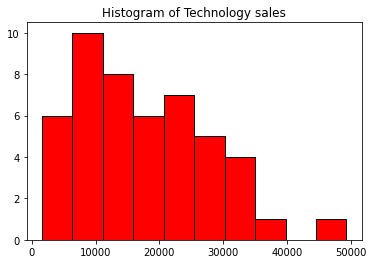

In [85]:
#2.Histogram plots
plt.hist(df_tech,color='red',edgecolor='black')
plt.title('Histogram of Technology sales')

In [86]:
#3.Augmented Dicky Fuller test(ADF test)
#null hypothesis-->series non stationary
#alternate hypothesis-->series stationary 
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_tech,regression='c')
print('ADF:',adf)
print('p-value:',pvalue)

ADF: -5.339163036535344
p-value: 4.5403459109922655e-06


In [87]:
#non-stationary to stationary transformation

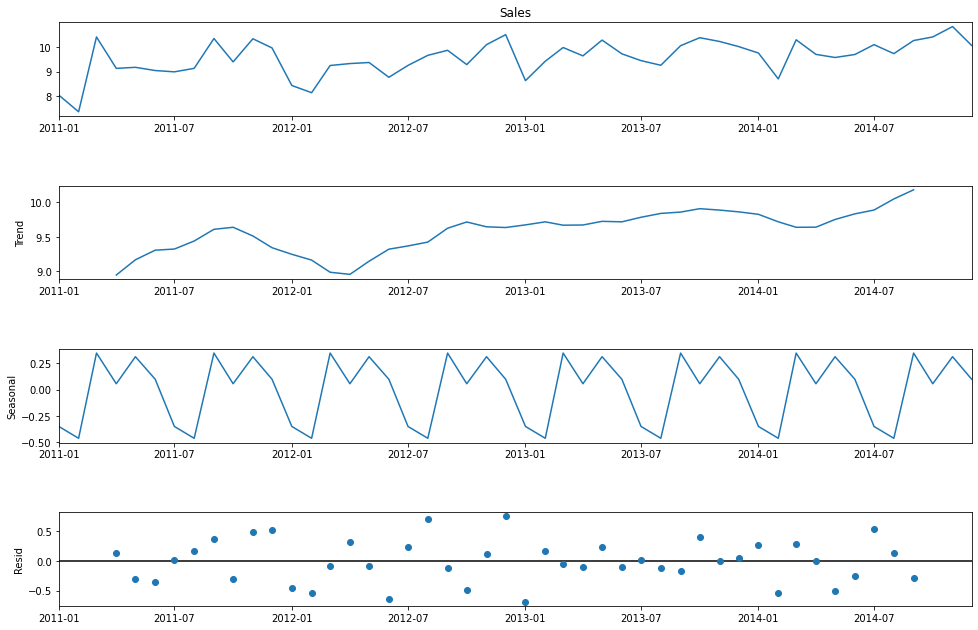

In [88]:
df_log_tech=np.log1p(df_tech)
fig=seasonal_decompose(df_log_tech,model='additive',period=6).plot()
adf,pvalue,usedlag,nobs,critical_values,icbest=adfuller(df_log_office,regression='c')
fig.set_figheight(10)
fig.set_figwidth(15)
plt.show()

In [89]:
#time component
time=np.arange(len(df_log_tech))
np_log_tech=df_log_tech.to_numpy()

In [90]:
#Train Test split
#20% of 97 instance is taken as test size
test_size=10
train=np_log_tech[:-test_size]
test=np_log_tech[-test_size:]

In [91]:
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=12).fit(optimized=True)
triple_preds=Triple.forecast(len(test))

In [92]:
triple_mse=mse(test,triple_preds)
print('MSE:',triple_mse)

MSE: 1.133672354436401


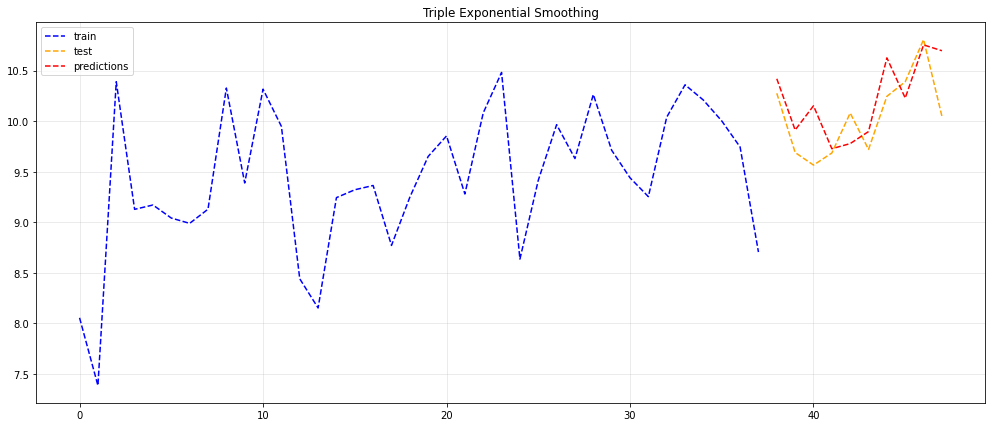

In [93]:
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

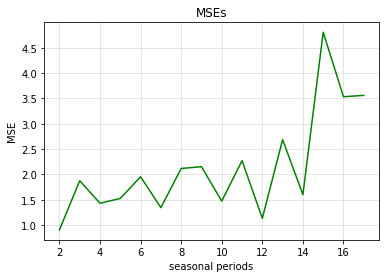

In [94]:
#best possible seasonal period selection
mse_list=[]
seasonal_period=[]

for i in range (2,18):
  Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=i).fit(optimized=True)
  triple_preds=Triple.forecast(len(test))
  triple_mse=mse(test,triple_preds)
  mse_list.append(triple_mse)
  seasonal_period.append(i)
plt.plot(seasonal_period,mse_list,color='g')
plt.title('MSEs')
plt.xlabel('seasonal periods')
plt.ylabel('MSE')
plt.grid(alpha=0.4)

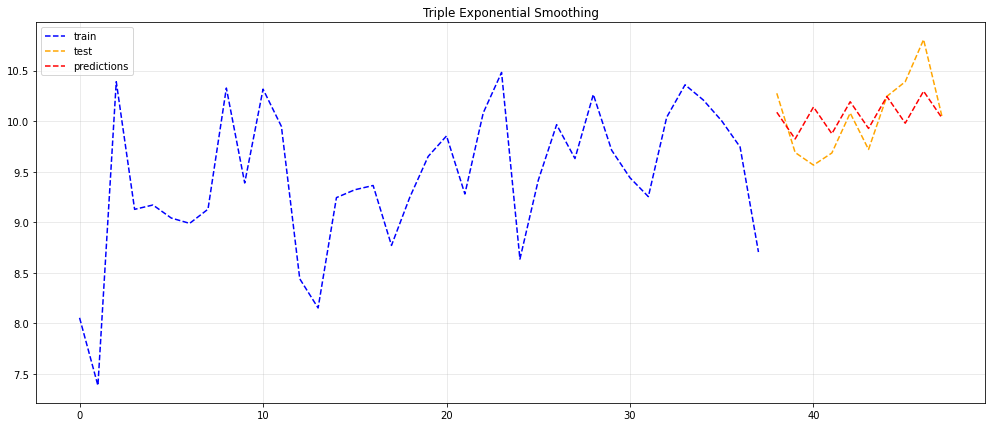

In [95]:
#lowest MSE @ seasonal period=2
Triple=ExponentialSmoothing(train,trend='additive',seasonal='additive',seasonal_periods=2).fit(optimized=True)
triple_preds=Triple.forecast(len(test))
plt.figure(figsize=(17,7))
plt.plot(time[:-test_size], train, 'b--', label="train")
plt.plot(time[-test_size:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-test_size:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

In [96]:
from pmdarima.arima import auto_arima
auto_model = auto_arima(df_log_tech, start_p=0, start_q=0,
                           max_p=3, max_q=3,m=12,
                           start_P=0,max_P=3,start_Q=0,max_Q=3, seasonal=True,
                           d=None, D=None,trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=118.090, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=102.822, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=116.217, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=111.592, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=103.226, Time=0.33 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=105.967, Time=0.15 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=112.277, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=95.507, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=108.083, Time=0.05 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=93.792, Time=0.39 sec
 ARIMA(2,1,0)(3,0,0)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=94.471, 

In [97]:
sar3 = SARIMAX(df_log_tech, order=(1,1,1),seasonal_order=(1,0,1,12),trend='c').fit()
sar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 -35.362
Date:                            Thu, 19 May 2022   AIC                             82.724
Time:                                    13:15:20   BIC                             93.825
Sample:                                01-01-2011   HQIC                            86.902
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.003      0.121      0.904      -0.006       0.007
ar.L1         -0.0710      0.234     -0.304      0.761      -0.529       0.387
ma.L1         -0.9842      0.181     -5.447      0.000      -1.338      -0.630
ar.S.L12       0.9824      0.147      6.665      0.000       0.694       1.271
ma.S.L12      -0.7947      0.830     -0.957      0.338      -2.422       0.832
sigma2         0.1821      0.108      1.692      0.091      -0.029       0.393
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 9.09
Prob(Q):                              0.70   Prob(JB):                         0.01
Heteroskedasticity (H):               0.36   Skew:                             0.89
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

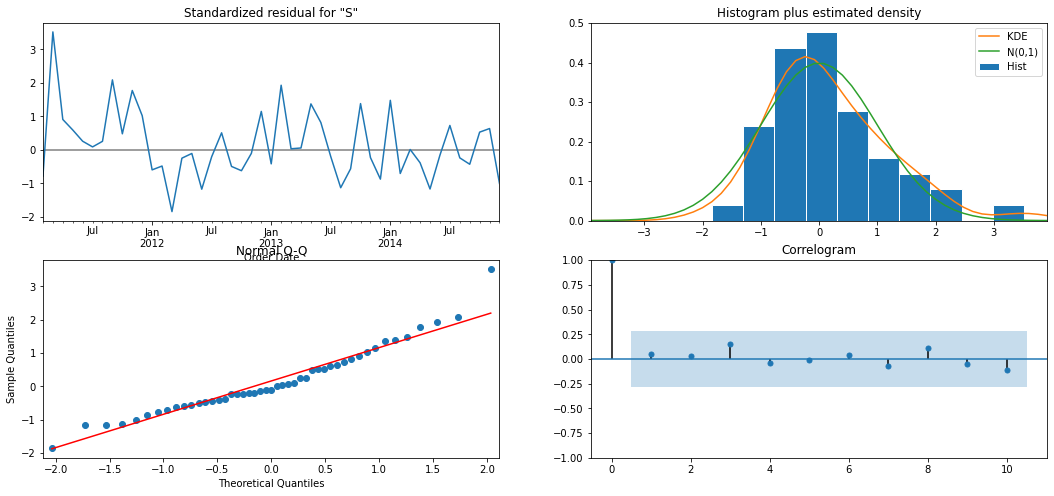

In [98]:
sar3.plot_diagnostics(figsize=(18,8))
plt.show()

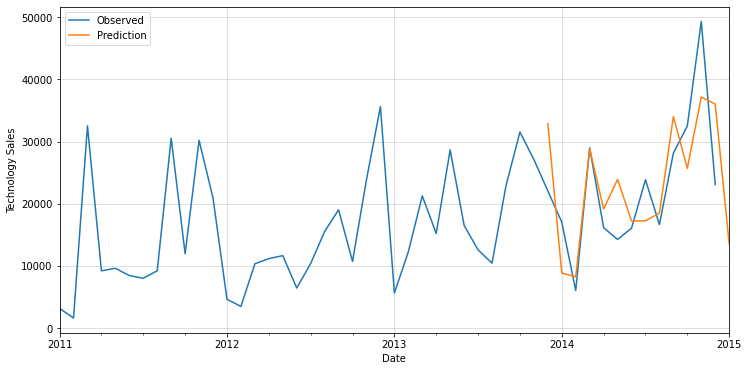

In [99]:
pd.plotting.register_matplotlib_converters()
pred=sar3.predict(start=35,end=48)
pred=np.expm1(pred)
ax=df_tech.astype(float).plot(label='Observed')
pred.plot(ax=ax,label='Prediction',figsize=(12,6))
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [100]:
print('_______PREDICTIONS_________')
print(pred)

_______PREDICTIONS_________
2013-12-01    32878.967787
2014-01-01     8832.998718
2014-02-01     8239.742284
2014-03-01    28837.228305
2014-04-01    19148.586687
2014-05-01    23923.255285
2014-06-01    17215.804792
2014-07-01    17252.666560
2014-08-01    18490.421315
2014-09-01    34029.986932
2014-10-01    25691.570291
2014-11-01    37173.373576
2014-12-01    36025.779895
2015-01-01    13556.120368
Freq: MS, Name: predicted_mean, dtype: float64


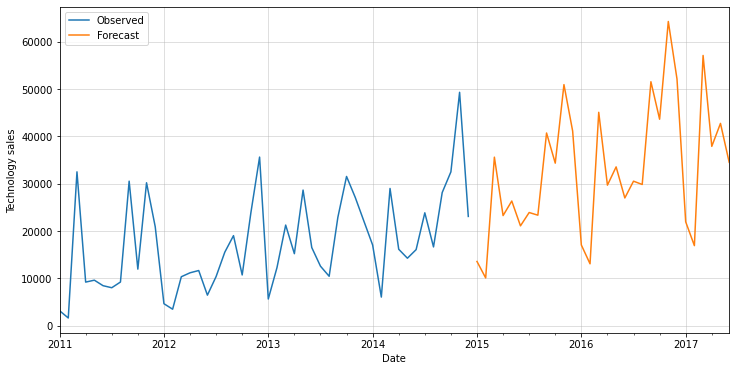

In [101]:
future_fcst=sar3.get_forecast(30)
fcst=future_fcst.predicted_mean
fcst=np.expm1(fcst)
bx=df_tech.plot(label='Observed')
fcst.plot(ax=bx,label='Forecast',figsize=(12,6))
bx.set_xlabel('Date')
bx.set_ylabel('Technology sales')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [102]:
print('_________FORECAST________')
print(fcst)

_________FORECAST________
2015-01-01    13556.120368
2015-02-01    10074.491612
2015-03-01    35614.653125
2015-04-01    23261.986916
2015-05-01    26337.739202
2015-06-01    21090.928758
2015-07-01    23907.220375
2015-08-01    23344.457850
2015-09-01    40724.892389
2015-10-01    34347.292104
2015-11-01    50954.336752
2015-12-01    41139.849021
2016-01-01    17040.511772
2016-02-01    13063.472974
2016-03-01    45099.303945
2016-04-01    29693.177433
2016-05-01    33557.419824
2016-06-01    26987.348046
2016-07-01    30534.361012
2016-08-01    29838.715042
2016-09-01    51564.784270
2016-10-01    43635.803802
2016-11-01    64308.568739
2016-12-01    52136.433381
2017-01-01    21941.139341
2017-02-01    16905.333144
2017-03-01    57122.664608
2017-04-01    37900.673742
2017-05-01    42756.009233
2017-06-01    34529.485594
Freq: MS, Name: predicted_mean, dtype: float64


In [103]:
#Prophet Model

In [104]:
tech=pd.DataFrame({'ds':df_tech.index,'y':df_tech.values})
tech_model=Prophet()
tech_model.fit(tech)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [105]:
tech_fcst=tech_model.make_future_dataframe(periods=36,freq='MS')
print(tech_fcst.head())
tech_fcst.tail()

          ds
0 2011-01-01
1 2011-02-01
2 2011-03-01
3 2011-04-01
4 2011-05-01


,ds
79,2017-08-01
80,2017-09-01
81,2017-10-01
82,2017-11-01
83,2017-12-01


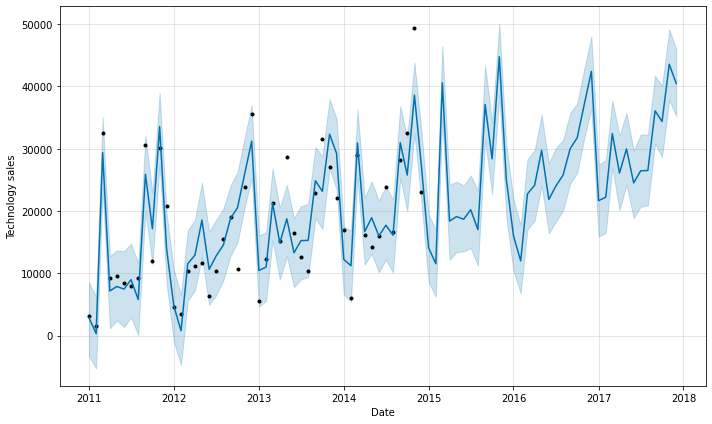

In [106]:
tech_fcst=tech_model.predict(tech_fcst)
tech_model.plot(tech_fcst,xlabel='Date',ylabel='Technology sales')
plt.show()

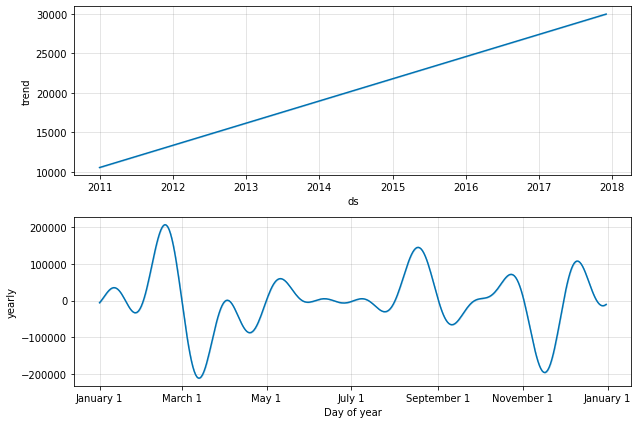

In [107]:
tech_model.plot_components(tech_fcst)
plt.show()